In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving insurance.csv.csv to insurance.csv.csv


In [ ]:
df = pd.read_csv('insurance.csv.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [ ]:
df=df.drop_duplicates()
print(df)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df['age']=df['age'].astype(int)
df['bmi']=df['bmi'].round(2)
df['children']=df['children'].astype(int)
df['smoker']=df['smoker'].str.strip().str.lower()
df['region']=df['region'].str.strip().str.lower()
df['charges']=df['charges'].round(2)
print(df)


      age     sex    bmi  children smoker     region   charges
0      19  female  27.90         0    yes  southwest  16884.92
1      18    male  33.77         1     no  southeast   1725.55
2      28    male  33.00         3     no  southeast   4449.46
3      33    male  22.70         0     no  northwest  21984.47
4      32    male  28.88         0     no  northwest   3866.86
...   ...     ...    ...       ...    ...        ...       ...
1333   50    male  30.97         3     no  northwest  10600.55
1334   18  female  31.92         0     no  northeast   2205.98
1335   18  female  36.85         0     no  southeast   1629.83
1336   21  female  25.80         0     no  southwest   2007.94
1337   61  female  29.07         0    yes  northwest  29141.36

[1337 rows x 7 columns]


In [ ]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
print(df)

      age     sex    bmi  children smoker     region   charges
0      19  female  27.90         0    yes  southwest  16884.92
1      18    male  33.77         1     no  southeast   1725.55
2      28    male  33.00         3     no  southeast   4449.46
3      33    male  22.70         0     no  northwest  21984.47
4      32    male  28.88         0     no  northwest   3866.86
...   ...     ...    ...       ...    ...        ...       ...
1333   50    male  30.97         3     no  northwest  10600.55
1334   18  female  31.92         0     no  northeast   2205.98
1335   18  female  36.85         0     no  southeast   1629.83
1336   21  female  25.80         0     no  southwest   2007.94
1337   61  female  29.07         0    yes  northwest  29141.36

[1337 rows x 7 columns]


/tmp/ipython-input-2883404269.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
df.to_csv('insurance_cleaned.csv', index=False)
print("Cleaned data saved to 'insurance_cleaned.csv'")

Cleaned data saved to 'insurance_cleaned.csv'


Average age,BMI,Children

In [ ]:
df[['age','bmi','children']].mean()

,0
age,39.222139
bmi,30.663628
children,1.095737


Average charges for smokers vs non-smokers

In [ ]:
df.groupby('smoker')['charges'].mean()

,charges
smoker,
no,8440.660310
yes,32050.231898


Average charges by region

In [ ]:
df.groupby('region')['charges'].mean()

,charges
region,
northeast,13406.384599
northwest,12450.840648
southeast,14735.411484
southwest,12346.937508


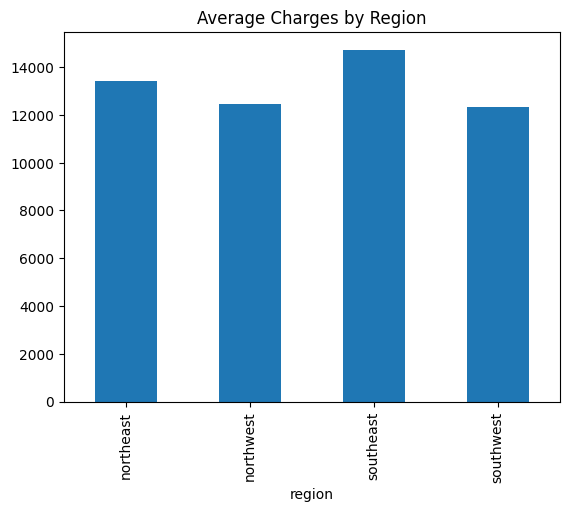

In [ ]:
import matplotlib.pyplot as plt

df.groupby('region')['charges'].mean().plot(kind='bar', title='Average Charges by Region')
plt.show()